## Chloe Quinto 
CS 583 HW 1  
4/13/20    
I pledge my honor that I have abided by the Stevens Honor System - Chloe Quinto    

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import sklearn 
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.utils import to_categorical
from keras import layers
from keras import models 
from keras.layers import Dense

import tensorflow as tf


Using TensorFlow backend.


In [2]:
wine = sklearn.datasets.load_wine()

# Preprocessing 

In this assignment, we attempt to build a neural network that can classify wines from 3 wineries by 13 attributes: 

In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
wine.data # values 

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine.target # class names 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
df = pd.DataFrame(wine.data)
df.columns = wine.feature_names
df["class"] = wine.target

In [7]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [9]:
df["class"].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [10]:
labels = df.loc[:,["class"]] # class are already integer encoded 
features = df.drop(["class"],axis=1)
print(labels.shape)
print(features.shape)

(178, 1)
(178, 13)


In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels)

In [12]:
print("xtrain", xtrain.shape)
print("xtest", xtest.shape)
print("ytrain", ytrain.shape)
print("ytest", ytest.shape)

xtrain (133, 13)
xtest (45, 13)
ytrain (133, 1)
ytest (45, 1)


In [13]:
ytrain = to_categorical(ytrain, 3)
ytest = to_categorical(ytest,3)

In [14]:
# scale data between 0 and 1 
scale = MinMaxScaler(feature_range=(0,1))
xtrain = scale.fit_transform(xtrain)
xtest = scale.fit_transform(xtest)

In [15]:
model = Sequential()
model.add(Dense(10, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 15        
Total params: 367
Trainable params: 367
Non-trainable params: 0
________________________________________________________

In [17]:
from keras import optimizers 

model.compile(loss="categorical_crossentropy", 
             optimizer = optimizers.RMSprop(lr = 1e-4), 
             metrics = ["acc"])

In [18]:
history = model.fit(xtrain, ytrain, batch_size=15, epochs=1200, verbose =1, validation_data=(xtest,ytest))

Instructions for updating:
Use tf.cast instead.
Train on 133 samples, validate on 45 samples
Epoch 1/1200
133/133 [==============================] - 0s 2ms/step - loss: 1.1033 - acc: 0.4060 - val_loss: 1.1178 - val_acc: 0.3778
Epoch 2/1200
133/133 [==============================] - 0s 155us/step - loss: 1.1025 - acc: 0.4060 - val_loss: 1.1172 - val_acc: 0.3778
Epoch 3/1200
133/133 [==============================] - 0s 212us/step - loss: 1.1020 - acc: 0.4060 - val_loss: 1.1166 - val_acc: 0.3778
Epoch 4/1200
133/133 [==============================] - 0s 207us/step - loss: 1.1014 - acc: 0.4060 - val_loss: 1.1160 - val_acc: 0.3778
Epoch 5/1200
133/133 [==============================] - 0s 233us/step - loss: 1.1009 - acc: 0.4060 - val_loss: 1.1155 - val_acc: 0.3778
Epoch 6/1200
133/133 [==============================] - 0s 153us/step - loss: 1.1003 - acc: 0.4060 - val_loss: 1.1148 - val_acc: 0.3778
Epoch 7/1200
133/133 [==============================] - 0s 178us/step - loss: 1.0997 - acc: 0

133/133 [==============================] - 0s 149us/step - loss: 1.0758 - acc: 0.4060 - val_loss: 1.0933 - val_acc: 0.3778
Epoch 59/1200
133/133 [==============================] - 0s 263us/step - loss: 1.0752 - acc: 0.4060 - val_loss: 1.0928 - val_acc: 0.3778
Epoch 60/1200
133/133 [==============================] - 0s 208us/step - loss: 1.0747 - acc: 0.4060 - val_loss: 1.0924 - val_acc: 0.3778
Epoch 61/1200
133/133 [==============================] - 0s 195us/step - loss: 1.0742 - acc: 0.4060 - val_loss: 1.0920 - val_acc: 0.3778
Epoch 62/1200
133/133 [==============================] - 0s 282us/step - loss: 1.0737 - acc: 0.4060 - val_loss: 1.0916 - val_acc: 0.3778
Epoch 63/1200
133/133 [==============================] - 0s 251us/step - loss: 1.0731 - acc: 0.4060 - val_loss: 1.0912 - val_acc: 0.3778
Epoch 64/1200
133/133 [==============================] - 0s 205us/step - loss: 1.0725 - acc: 0.4060 - val_loss: 1.0907 - val_acc: 0.3778
Epoch 65/1200
133/133 [==============================] 

Epoch 118/1200
133/133 [==============================] - 0s 160us/step - loss: 1.0343 - acc: 0.4060 - val_loss: 1.0593 - val_acc: 0.3778
Epoch 119/1200
133/133 [==============================] - 0s 142us/step - loss: 1.0334 - acc: 0.4060 - val_loss: 1.0586 - val_acc: 0.3778
Epoch 120/1200
133/133 [==============================] - 0s 148us/step - loss: 1.0325 - acc: 0.4060 - val_loss: 1.0579 - val_acc: 0.3778
Epoch 121/1200
133/133 [==============================] - 0s 191us/step - loss: 1.0317 - acc: 0.4060 - val_loss: 1.0572 - val_acc: 0.3778
Epoch 122/1200
133/133 [==============================] - 0s 192us/step - loss: 1.0308 - acc: 0.4060 - val_loss: 1.0565 - val_acc: 0.3778
Epoch 123/1200
133/133 [==============================] - 0s 135us/step - loss: 1.0300 - acc: 0.4060 - val_loss: 1.0558 - val_acc: 0.3778
Epoch 124/1200
133/133 [==============================] - 0s 136us/step - loss: 1.0290 - acc: 0.4060 - val_loss: 1.0551 - val_acc: 0.3778
Epoch 125/1200
133/133 [==========

133/133 [==============================] - 0s 139us/step - loss: 0.9708 - acc: 0.4060 - val_loss: 1.0092 - val_acc: 0.3778
Epoch 178/1200
133/133 [==============================] - 0s 155us/step - loss: 0.9697 - acc: 0.4060 - val_loss: 1.0083 - val_acc: 0.3778
Epoch 179/1200
133/133 [==============================] - 0s 111us/step - loss: 0.9685 - acc: 0.4060 - val_loss: 1.0074 - val_acc: 0.3778
Epoch 180/1200
133/133 [==============================] - 0s 105us/step - loss: 0.9673 - acc: 0.4060 - val_loss: 1.0064 - val_acc: 0.3778
Epoch 181/1200
133/133 [==============================] - 0s 136us/step - loss: 0.9661 - acc: 0.4060 - val_loss: 1.0054 - val_acc: 0.3778
Epoch 182/1200
133/133 [==============================] - 0s 182us/step - loss: 0.9648 - acc: 0.4060 - val_loss: 1.0043 - val_acc: 0.3778
Epoch 183/1200
133/133 [==============================] - 0s 160us/step - loss: 0.9636 - acc: 0.4060 - val_loss: 1.0032 - val_acc: 0.3778
Epoch 184/1200
133/133 [=========================

133/133 [==============================] - 0s 149us/step - loss: 0.8967 - acc: 0.5714 - val_loss: 0.9467 - val_acc: 0.5778
Epoch 237/1200
133/133 [==============================] - 0s 181us/step - loss: 0.8955 - acc: 0.5789 - val_loss: 0.9457 - val_acc: 0.5778
Epoch 238/1200
133/133 [==============================] - 0s 191us/step - loss: 0.8943 - acc: 0.5789 - val_loss: 0.9447 - val_acc: 0.5778
Epoch 239/1200
133/133 [==============================] - 0s 148us/step - loss: 0.8932 - acc: 0.5714 - val_loss: 0.9437 - val_acc: 0.5778
Epoch 240/1200
133/133 [==============================] - 0s 113us/step - loss: 0.8920 - acc: 0.5789 - val_loss: 0.9427 - val_acc: 0.5778
Epoch 241/1200
133/133 [==============================] - 0s 167us/step - loss: 0.8912 - acc: 0.5789 - val_loss: 0.9418 - val_acc: 0.5778
Epoch 242/1200
133/133 [==============================] - 0s 142us/step - loss: 0.8899 - acc: 0.5789 - val_loss: 0.9408 - val_acc: 0.5778
Epoch 243/1200
133/133 [=========================

133/133 [==============================] - 0s 115us/step - loss: 0.8367 - acc: 0.6466 - val_loss: 0.8950 - val_acc: 0.6000
Epoch 296/1200
133/133 [==============================] - 0s 119us/step - loss: 0.8359 - acc: 0.6466 - val_loss: 0.8943 - val_acc: 0.6000
Epoch 297/1200
133/133 [==============================] - 0s 152us/step - loss: 0.8349 - acc: 0.6466 - val_loss: 0.8936 - val_acc: 0.6000
Epoch 298/1200
133/133 [==============================] - 0s 118us/step - loss: 0.8341 - acc: 0.6466 - val_loss: 0.8929 - val_acc: 0.6000
Epoch 299/1200
133/133 [==============================] - 0s 104us/step - loss: 0.8332 - acc: 0.6466 - val_loss: 0.8921 - val_acc: 0.6000
Epoch 300/1200
133/133 [==============================] - 0s 94us/step - loss: 0.8322 - acc: 0.6466 - val_loss: 0.8913 - val_acc: 0.6000
Epoch 301/1200
133/133 [==============================] - 0s 98us/step - loss: 0.8312 - acc: 0.6466 - val_loss: 0.8903 - val_acc: 0.6000
Epoch 302/1200
133/133 [===========================

133/133 [==============================] - 0s 101us/step - loss: 0.7806 - acc: 0.6692 - val_loss: 0.8390 - val_acc: 0.6444
Epoch 355/1200
133/133 [==============================] - 0s 97us/step - loss: 0.7790 - acc: 0.6692 - val_loss: 0.8376 - val_acc: 0.6444
Epoch 356/1200
133/133 [==============================] - 0s 131us/step - loss: 0.7781 - acc: 0.6767 - val_loss: 0.8365 - val_acc: 0.6444
Epoch 357/1200
133/133 [==============================] - 0s 102us/step - loss: 0.7767 - acc: 0.6692 - val_loss: 0.8351 - val_acc: 0.6444
Epoch 358/1200
133/133 [==============================] - 0s 104us/step - loss: 0.7755 - acc: 0.6767 - val_loss: 0.8337 - val_acc: 0.6444
Epoch 359/1200
133/133 [==============================] - 0s 100us/step - loss: 0.7742 - acc: 0.6767 - val_loss: 0.8324 - val_acc: 0.6444
Epoch 360/1200
133/133 [==============================] - 0s 100us/step - loss: 0.7732 - acc: 0.6767 - val_loss: 0.8311 - val_acc: 0.6444
Epoch 361/1200
133/133 [==========================

133/133 [==============================] - 0s 129us/step - loss: 0.6985 - acc: 0.7143 - val_loss: 0.7550 - val_acc: 0.6889
Epoch 414/1200
133/133 [==============================] - 0s 116us/step - loss: 0.6970 - acc: 0.7143 - val_loss: 0.7535 - val_acc: 0.6889
Epoch 415/1200
133/133 [==============================] - 0s 124us/step - loss: 0.6957 - acc: 0.7143 - val_loss: 0.7519 - val_acc: 0.6889
Epoch 416/1200
133/133 [==============================] - 0s 112us/step - loss: 0.6940 - acc: 0.7143 - val_loss: 0.7506 - val_acc: 0.6889
Epoch 417/1200
133/133 [==============================] - 0s 108us/step - loss: 0.6924 - acc: 0.7143 - val_loss: 0.7491 - val_acc: 0.6889
Epoch 418/1200
133/133 [==============================] - 0s 116us/step - loss: 0.6907 - acc: 0.7143 - val_loss: 0.7475 - val_acc: 0.6889
Epoch 419/1200
133/133 [==============================] - 0s 112us/step - loss: 0.6895 - acc: 0.7218 - val_loss: 0.7460 - val_acc: 0.6889
Epoch 420/1200
133/133 [=========================

133/133 [==============================] - 0s 121us/step - loss: 0.6042 - acc: 0.9323 - val_loss: 0.6685 - val_acc: 0.9556
Epoch 473/1200
133/133 [==============================] - 0s 111us/step - loss: 0.6023 - acc: 0.9323 - val_loss: 0.6670 - val_acc: 0.9556
Epoch 474/1200
133/133 [==============================] - 0s 107us/step - loss: 0.6005 - acc: 0.9323 - val_loss: 0.6655 - val_acc: 0.9556
Epoch 475/1200
133/133 [==============================] - 0s 185us/step - loss: 0.5989 - acc: 0.9323 - val_loss: 0.6640 - val_acc: 0.9556
Epoch 476/1200
133/133 [==============================] - 0s 118us/step - loss: 0.5974 - acc: 0.9398 - val_loss: 0.6624 - val_acc: 0.9556
Epoch 477/1200
133/133 [==============================] - 0s 114us/step - loss: 0.5955 - acc: 0.9398 - val_loss: 0.6609 - val_acc: 0.9556
Epoch 478/1200
133/133 [==============================] - 0s 107us/step - loss: 0.5937 - acc: 0.9398 - val_loss: 0.6594 - val_acc: 0.9556
Epoch 479/1200
133/133 [=========================

133/133 [==============================] - 0s 105us/step - loss: 0.5045 - acc: 0.9699 - val_loss: 0.5800 - val_acc: 0.9333
Epoch 532/1200
133/133 [==============================] - 0s 115us/step - loss: 0.5027 - acc: 0.9699 - val_loss: 0.5784 - val_acc: 0.9333
Epoch 533/1200
133/133 [==============================] - 0s 130us/step - loss: 0.5011 - acc: 0.9699 - val_loss: 0.5769 - val_acc: 0.9333
Epoch 534/1200
133/133 [==============================] - 0s 108us/step - loss: 0.4994 - acc: 0.9699 - val_loss: 0.5752 - val_acc: 0.9333
Epoch 535/1200
133/133 [==============================] - 0s 119us/step - loss: 0.4974 - acc: 0.9699 - val_loss: 0.5735 - val_acc: 0.9333
Epoch 536/1200
133/133 [==============================] - 0s 120us/step - loss: 0.4960 - acc: 0.9699 - val_loss: 0.5719 - val_acc: 0.9333
Epoch 537/1200
133/133 [==============================] - 0s 170us/step - loss: 0.4940 - acc: 0.9699 - val_loss: 0.5703 - val_acc: 0.9333
Epoch 538/1200
133/133 [=========================

133/133 [==============================] - 0s 122us/step - loss: 0.3986 - acc: 0.9774 - val_loss: 0.4820 - val_acc: 0.9333
Epoch 591/1200
133/133 [==============================] - 0s 143us/step - loss: 0.3965 - acc: 0.9774 - val_loss: 0.4802 - val_acc: 0.9333
Epoch 592/1200
133/133 [==============================] - 0s 136us/step - loss: 0.3951 - acc: 0.9774 - val_loss: 0.4785 - val_acc: 0.9333
Epoch 593/1200
133/133 [==============================] - 0s 153us/step - loss: 0.3928 - acc: 0.9774 - val_loss: 0.4767 - val_acc: 0.9333
Epoch 594/1200
133/133 [==============================] - 0s 141us/step - loss: 0.3913 - acc: 0.9774 - val_loss: 0.4750 - val_acc: 0.9333
Epoch 595/1200
133/133 [==============================] - 0s 136us/step - loss: 0.3895 - acc: 0.9774 - val_loss: 0.4733 - val_acc: 0.9333
Epoch 596/1200
133/133 [==============================] - 0s 134us/step - loss: 0.3876 - acc: 0.9774 - val_loss: 0.4718 - val_acc: 0.9333
Epoch 597/1200
133/133 [=========================

133/133 [==============================] - 0s 96us/step - loss: 0.2989 - acc: 0.9850 - val_loss: 0.3893 - val_acc: 0.9333
Epoch 650/1200
133/133 [==============================] - 0s 107us/step - loss: 0.2971 - acc: 0.9850 - val_loss: 0.3881 - val_acc: 0.9333
Epoch 651/1200
133/133 [==============================] - 0s 100us/step - loss: 0.2956 - acc: 0.9850 - val_loss: 0.3864 - val_acc: 0.9333
Epoch 652/1200
133/133 [==============================] - 0s 96us/step - loss: 0.2941 - acc: 0.9850 - val_loss: 0.3847 - val_acc: 0.9333
Epoch 653/1200
133/133 [==============================] - 0s 93us/step - loss: 0.2926 - acc: 0.9850 - val_loss: 0.3835 - val_acc: 0.9333
Epoch 654/1200
133/133 [==============================] - 0s 89us/step - loss: 0.2913 - acc: 0.9850 - val_loss: 0.3823 - val_acc: 0.9333
Epoch 655/1200
133/133 [==============================] - 0s 96us/step - loss: 0.2900 - acc: 0.9850 - val_loss: 0.3810 - val_acc: 0.9333
Epoch 656/1200
133/133 [==============================

133/133 [==============================] - 0s 117us/step - loss: 0.2247 - acc: 0.9850 - val_loss: 0.3206 - val_acc: 0.9333
Epoch 709/1200
133/133 [==============================] - 0s 109us/step - loss: 0.2238 - acc: 0.9850 - val_loss: 0.3196 - val_acc: 0.9333
Epoch 710/1200
133/133 [==============================] - 0s 104us/step - loss: 0.2226 - acc: 0.9850 - val_loss: 0.3190 - val_acc: 0.9111
Epoch 711/1200
133/133 [==============================] - 0s 99us/step - loss: 0.2216 - acc: 0.9850 - val_loss: 0.3177 - val_acc: 0.9333
Epoch 712/1200
133/133 [==============================] - 0s 102us/step - loss: 0.2207 - acc: 0.9850 - val_loss: 0.3168 - val_acc: 0.9111
Epoch 713/1200
133/133 [==============================] - 0s 100us/step - loss: 0.2195 - acc: 0.9850 - val_loss: 0.3157 - val_acc: 0.9111
Epoch 714/1200
133/133 [==============================] - 0s 108us/step - loss: 0.2186 - acc: 0.9850 - val_loss: 0.3146 - val_acc: 0.9111
Epoch 715/1200
133/133 [==========================

133/133 [==============================] - 0s 115us/step - loss: 0.1597 - acc: 0.9925 - val_loss: 0.2614 - val_acc: 0.9111
Epoch 768/1200
133/133 [==============================] - 0s 162us/step - loss: 0.1584 - acc: 0.9925 - val_loss: 0.2604 - val_acc: 0.9111
Epoch 769/1200
133/133 [==============================] - 0s 111us/step - loss: 0.1575 - acc: 0.9850 - val_loss: 0.2601 - val_acc: 0.9111
Epoch 770/1200
133/133 [==============================] - 0s 113us/step - loss: 0.1564 - acc: 0.9850 - val_loss: 0.2590 - val_acc: 0.9111
Epoch 771/1200
133/133 [==============================] - 0s 110us/step - loss: 0.1550 - acc: 0.9925 - val_loss: 0.2578 - val_acc: 0.9111
Epoch 772/1200
133/133 [==============================] - 0s 111us/step - loss: 0.1540 - acc: 0.9925 - val_loss: 0.2563 - val_acc: 0.9111
Epoch 773/1200
133/133 [==============================] - 0s 110us/step - loss: 0.1530 - acc: 0.9925 - val_loss: 0.2556 - val_acc: 0.9111
Epoch 774/1200
133/133 [=========================

133/133 [==============================] - 0s 106us/step - loss: 0.0969 - acc: 0.9925 - val_loss: 0.2098 - val_acc: 0.9333
Epoch 827/1200
133/133 [==============================] - 0s 113us/step - loss: 0.0959 - acc: 0.9925 - val_loss: 0.2099 - val_acc: 0.9333
Epoch 828/1200
133/133 [==============================] - 0s 113us/step - loss: 0.0950 - acc: 0.9925 - val_loss: 0.2106 - val_acc: 0.9333
Epoch 829/1200
133/133 [==============================] - 0s 99us/step - loss: 0.0940 - acc: 0.9925 - val_loss: 0.2097 - val_acc: 0.9333
Epoch 830/1200
133/133 [==============================] - 0s 104us/step - loss: 0.0933 - acc: 0.9925 - val_loss: 0.2092 - val_acc: 0.9333
Epoch 831/1200
133/133 [==============================] - 0s 104us/step - loss: 0.0924 - acc: 0.9925 - val_loss: 0.2076 - val_acc: 0.9333
Epoch 832/1200
133/133 [==============================] - 0s 102us/step - loss: 0.0919 - acc: 0.9925 - val_loss: 0.2067 - val_acc: 0.9333
Epoch 833/1200
133/133 [==========================

133/133 [==============================] - 0s 117us/step - loss: 0.0552 - acc: 1.0000 - val_loss: 0.1881 - val_acc: 0.9111
Epoch 886/1200
133/133 [==============================] - 0s 101us/step - loss: 0.0546 - acc: 1.0000 - val_loss: 0.1867 - val_acc: 0.9111
Epoch 887/1200
133/133 [==============================] - 0s 120us/step - loss: 0.0544 - acc: 1.0000 - val_loss: 0.1861 - val_acc: 0.9111
Epoch 888/1200
133/133 [==============================] - 0s 107us/step - loss: 0.0539 - acc: 1.0000 - val_loss: 0.1857 - val_acc: 0.9111
Epoch 889/1200
133/133 [==============================] - 0s 107us/step - loss: 0.0532 - acc: 1.0000 - val_loss: 0.1850 - val_acc: 0.9111
Epoch 890/1200
133/133 [==============================] - 0s 107us/step - loss: 0.0529 - acc: 1.0000 - val_loss: 0.1850 - val_acc: 0.9111
Epoch 891/1200
133/133 [==============================] - 0s 104us/step - loss: 0.0522 - acc: 1.0000 - val_loss: 0.1862 - val_acc: 0.9111
Epoch 892/1200
133/133 [=========================

133/133 [==============================] - 0s 99us/step - loss: 0.0331 - acc: 1.0000 - val_loss: 0.1842 - val_acc: 0.9111
Epoch 945/1200
133/133 [==============================] - 0s 95us/step - loss: 0.0326 - acc: 1.0000 - val_loss: 0.1858 - val_acc: 0.9111
Epoch 946/1200
133/133 [==============================] - 0s 101us/step - loss: 0.0326 - acc: 1.0000 - val_loss: 0.1860 - val_acc: 0.9111
Epoch 947/1200
133/133 [==============================] - 0s 98us/step - loss: 0.0321 - acc: 1.0000 - val_loss: 0.1846 - val_acc: 0.9111
Epoch 948/1200
133/133 [==============================] - 0s 98us/step - loss: 0.0318 - acc: 1.0000 - val_loss: 0.1850 - val_acc: 0.9111
Epoch 949/1200
133/133 [==============================] - 0s 108us/step - loss: 0.0316 - acc: 1.0000 - val_loss: 0.1857 - val_acc: 0.9111
Epoch 950/1200
133/133 [==============================] - 0s 95us/step - loss: 0.0311 - acc: 1.0000 - val_loss: 0.1829 - val_acc: 0.9111
Epoch 951/1200
133/133 [==============================

133/133 [==============================] - 0s 103us/step - loss: 0.0201 - acc: 1.0000 - val_loss: 0.1908 - val_acc: 0.9111
Epoch 1004/1200
133/133 [==============================] - 0s 106us/step - loss: 0.0199 - acc: 1.0000 - val_loss: 0.1916 - val_acc: 0.9111
Epoch 1005/1200
133/133 [==============================] - 0s 123us/step - loss: 0.0198 - acc: 1.0000 - val_loss: 0.1900 - val_acc: 0.9111
Epoch 1006/1200
133/133 [==============================] - 0s 106us/step - loss: 0.0196 - acc: 1.0000 - val_loss: 0.1911 - val_acc: 0.9111
Epoch 1007/1200
133/133 [==============================] - 0s 98us/step - loss: 0.0195 - acc: 1.0000 - val_loss: 0.1907 - val_acc: 0.9111
Epoch 1008/1200
133/133 [==============================] - 0s 101us/step - loss: 0.0193 - acc: 1.0000 - val_loss: 0.1934 - val_acc: 0.9111
Epoch 1009/1200
133/133 [==============================] - 0s 106us/step - loss: 0.0192 - acc: 1.0000 - val_loss: 0.1911 - val_acc: 0.9111
Epoch 1010/1200
133/133 [===================

133/133 [==============================] - 0s 129us/step - loss: 0.0127 - acc: 1.0000 - val_loss: 0.1992 - val_acc: 0.9111
Epoch 1063/1200
133/133 [==============================] - 0s 124us/step - loss: 0.0126 - acc: 1.0000 - val_loss: 0.1982 - val_acc: 0.9111
Epoch 1064/1200
133/133 [==============================] - 0s 110us/step - loss: 0.0125 - acc: 1.0000 - val_loss: 0.1993 - val_acc: 0.9111
Epoch 1065/1200
133/133 [==============================] - 0s 111us/step - loss: 0.0125 - acc: 1.0000 - val_loss: 0.1986 - val_acc: 0.9111
Epoch 1066/1200
133/133 [==============================] - 0s 113us/step - loss: 0.0124 - acc: 1.0000 - val_loss: 0.1982 - val_acc: 0.9111
Epoch 1067/1200
133/133 [==============================] - 0s 107us/step - loss: 0.0122 - acc: 1.0000 - val_loss: 0.1968 - val_acc: 0.9111
Epoch 1068/1200
133/133 [==============================] - 0s 110us/step - loss: 0.0121 - acc: 1.0000 - val_loss: 0.1980 - val_acc: 0.9111
Epoch 1069/1200
133/133 [==================

133/133 [==============================] - 0s 116us/step - loss: 0.0081 - acc: 1.0000 - val_loss: 0.2130 - val_acc: 0.9333
Epoch 1122/1200
133/133 [==============================] - 0s 131us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.2128 - val_acc: 0.9333
Epoch 1123/1200
133/133 [==============================] - 0s 126us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.2094 - val_acc: 0.9333
Epoch 1124/1200
133/133 [==============================] - 0s 117us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.2119 - val_acc: 0.9333
Epoch 1125/1200
133/133 [==============================] - 0s 113us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 0.2117 - val_acc: 0.9333
Epoch 1126/1200
133/133 [==============================] - 0s 111us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.2125 - val_acc: 0.9333
Epoch 1127/1200
133/133 [==============================] - 0s 105us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.2131 - val_acc: 0.9333
Epoch 1128/1200
133/133 [==================

133/133 [==============================] - 0s 121us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.2240 - val_acc: 0.9333
Epoch 1181/1200
133/133 [==============================] - 0s 121us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.2286 - val_acc: 0.9333
Epoch 1182/1200
133/133 [==============================] - 0s 119us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.2264 - val_acc: 0.9333
Epoch 1183/1200
133/133 [==============================] - 0s 108us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.2287 - val_acc: 0.9333
Epoch 1184/1200
133/133 [==============================] - 0s 109us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.2239 - val_acc: 0.9333
Epoch 1185/1200
133/133 [==============================] - 0s 110us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.2227 - val_acc: 0.9333
Epoch 1186/1200
133/133 [==============================] - 0s 118us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.2220 - val_acc: 0.9333
Epoch 1187/1200
133/133 [==================

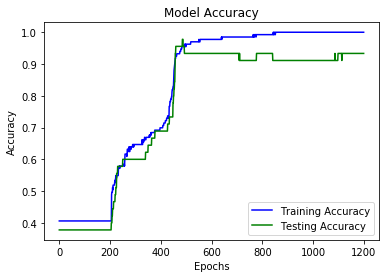

In [35]:
import matplotlib.pyplot as plt 

train_acc = history.history["acc"]
valid_acc = history.history["val_acc"]
epochs = range(1200)

plt.plot(epochs, train_acc, "b", label="Training Accuracy")
plt.plot(epochs, valid_acc, "g", label="Testing Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

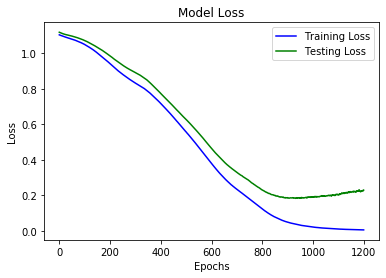

In [36]:
plt.plot(epochs, history.history["loss"], "b", label="Training Loss")
plt.plot(epochs, history.history["val_loss"], "g", label="Testing Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

In [21]:
lossAndAcc = model.evaluate(xtest, ytest)
print("Loss=", lossAndAcc[0])
print("Accuracy=", lossAndAcc[1])

45/45 [==============================] - 0s 80us/step
Loss= 0.22848729187001784
Accuracy= 0.9333333373069763
